In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
url = 'https://raw.githubusercontent.com/CoreyMSchafer/code_snippets/master/Python/Matplotlib/02-BarCharts/data.csv'
df = pd.read_csv(url, index_col='Responder_id')
df.head()

,LanguagesWorkedWith
Responder_id,
1,HTML/CSS;Java;JavaScript;Python
2,C++;HTML/CSS;Python
3,HTML/CSS
4,C;C++;C#;Python;SQL
5,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87569 entries, 1 to 88863
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   LanguagesWorkedWith  87569 non-null  object
dtypes: object(1)
memory usage: 1.3+ MB


In [4]:
df['LanguagesWorkedWith'] = df['LanguagesWorkedWith'].str.split(';')
df.head()

,LanguagesWorkedWith
Responder_id,
1,"[HTML/CSS, Java, JavaScript, Python]"
2,"[C++, HTML/CSS, Python]"
3,[HTML/CSS]
4,"[C, C++, C#, Python, SQL]"
5,"[C++, HTML/CSS, Java, JavaScript, Python, SQL,..."


In [5]:
df['LanguagesWorkedWith'].explode().unique()

array(['HTML/CSS', 'Java', 'JavaScript', 'Python', 'C++', 'C', 'C#',
       'SQL', 'VBA', 'R', 'Bash/Shell/PowerShell', 'Ruby', 'Rust',
       'TypeScript', 'WebAssembly', 'Other(s):', 'Go', 'PHP', 'Assembly',
       'Kotlin', 'Swift', 'Objective-C', 'Elixir', 'Erlang', 'Clojure',
       'F#', 'Scala', 'Dart'], dtype=object)

In [6]:
df['LanguagesWorkedWith'].to_list()[:5]

[['HTML/CSS', 'Java', 'JavaScript', 'Python'],
 ['C++', 'HTML/CSS', 'Python'],
 ['HTML/CSS'],
 ['C', 'C++', 'C#', 'Python', 'SQL'],
 ['C++', 'HTML/CSS', 'Java', 'JavaScript', 'Python', 'SQL', 'VBA']]

In [7]:
res = pd.DataFrame(df['LanguagesWorkedWith'].to_list()).stack().value_counts()
res.head(10)

JavaScript               59219
HTML/CSS                 55466
SQL                      47544
Python                   36443
Java                     35917
Bash/Shell/PowerShell    31991
C#                       27097
PHP                      23030
C++                      20524
TypeScript               18523
dtype: int64

In [8]:
from itertools import chain

In [9]:
res = pd.Series(Counter(chain.from_iterable(df['LanguagesWorkedWith']))).sort_values(ascending=False)
res.head(10)

JavaScript               59219
HTML/CSS                 55466
SQL                      47544
Python                   36443
Java                     35917
Bash/Shell/PowerShell    31991
C#                       27097
PHP                      23030
C++                      20524
TypeScript               18523
dtype: int64

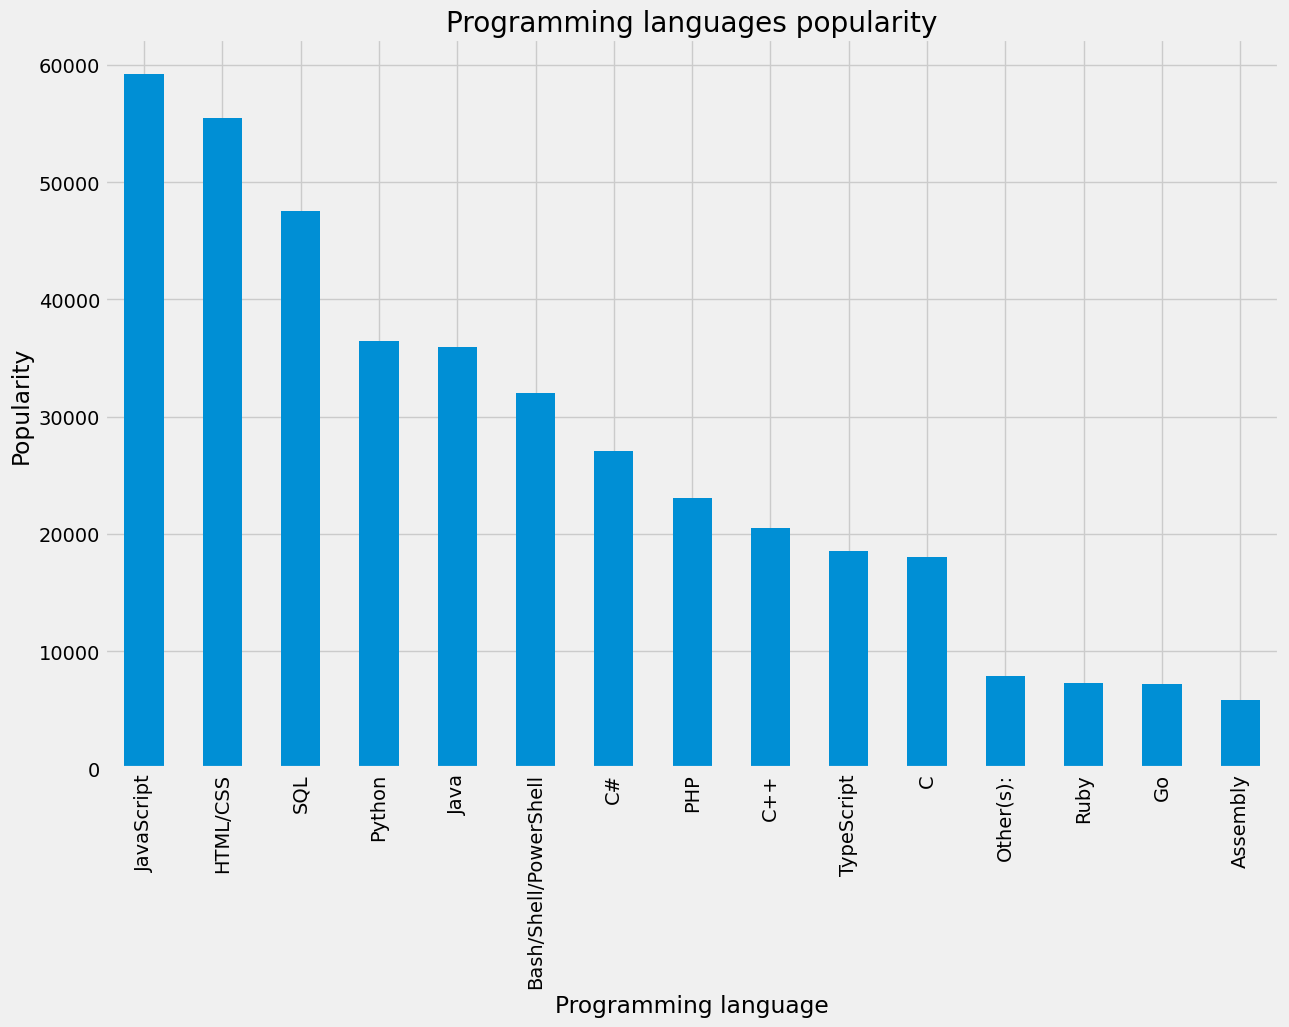

In [35]:
plt.style.use('fivethirtyeight')

res.head(15).plot.bar(title='Programming languages popularity', xlabel='Programming language', ylabel='Popularity').get_figure().set_size_inches(13.5, 9)

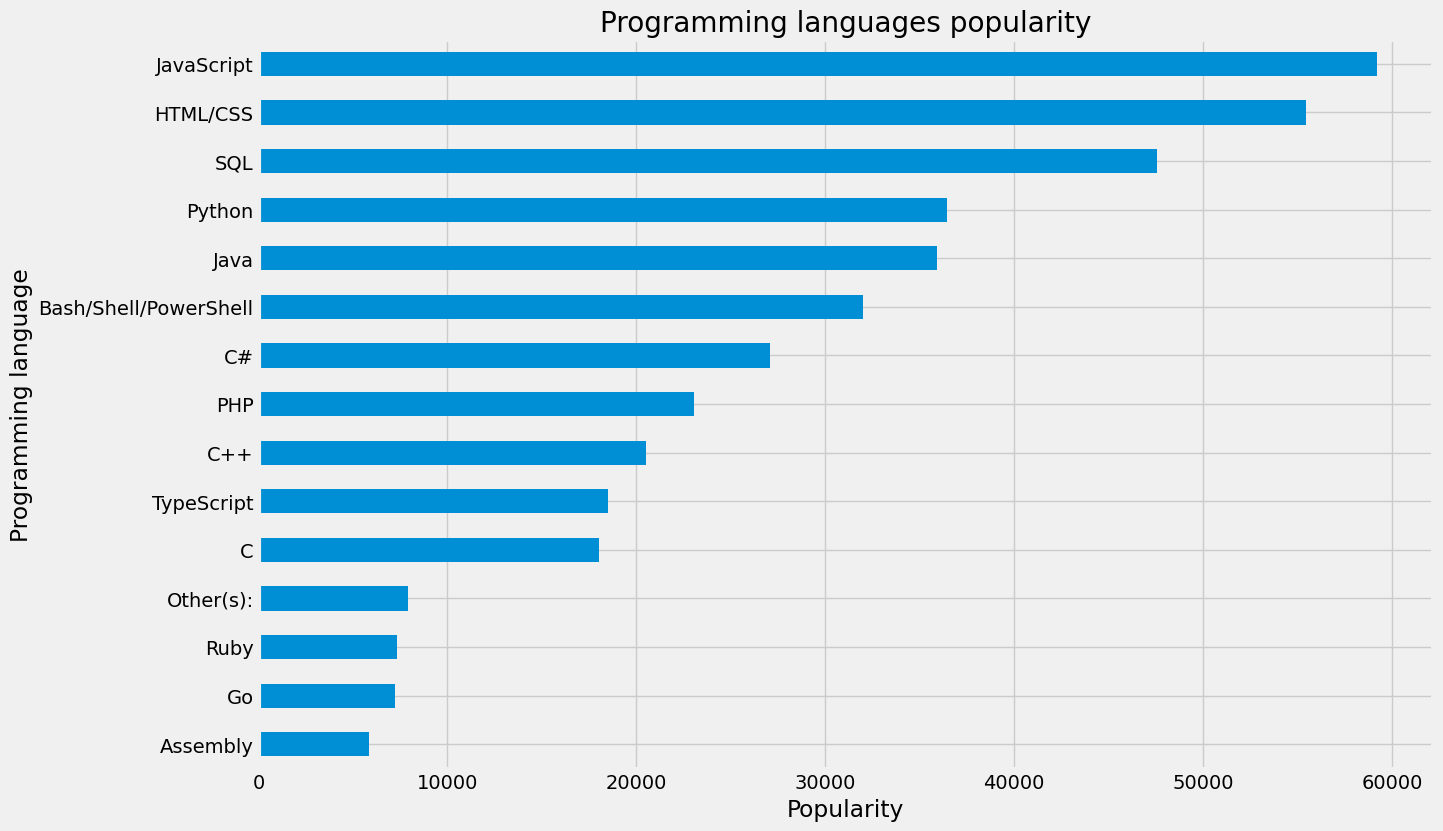

In [32]:
res.head(15).sort_values().plot.barh(title='Programming languages popularity', ylabel='Programming language', xlabel='Popularity').get_figure().set_size_inches(13.5, 9)